In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from data_leipzig import features_df_leipzig
features_df_leipzig.head()

,BIP/Einwohner,Anzahl Arbeitsloser,Durchschnittsalter,Wohnraum/Einwohner,Gesamtpopulation,Anzahl Frauen im geb. fähigen Alter,Anzahl der Geburten,Stadt
2002,23078,45376,4353239.0,42.0,494795,101048,3749,Leipzig
2003,23484,44627,4366615.0,42.0,497531,102206,3976,Leipzig
2004,23726,43957,4380127.0,42.0,498491,102883,4251,Leipzig
2005,24095,46870,4384754.0,415.0,502651,104506,4370,Leipzig
2006,25865,42273,439089.0,412.0,506578,104904,4378,Leipzig


In [2]:
# Data Splitting in test and train

x = features_df_leipzig.iloc[:, :-2]
y = features_df_leipzig.iloc[:, -2]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# MLR Model Creation
mlr = LinearRegression()
mlr.fit(x_train, y_train)

# Coefficients
coef_names = x.columns
coef_values = mlr.coef_
print(list(zip(coef_names, coef_values)))

[('BIP/Einwohner', 0.02328924924872245), ('Anzahl Arbeitsloser', -0.07626253118505026), ('Durchschnittsalter', 6.0487425610974976e-05), ('Wohnraum/Einwohner', 1.0348657993828292), ('Gesamtpopulation', 0.004644633500383857), ('Anzahl Frauen im geb. fähigen Alter', -0.00040526536976454426)]


In [3]:
# Predictions
y_pred_mlr = mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))

# Comparing Actual and Predictions
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr}).astype(int).sort_index()
print(mlr_diff.head())

Prediction for test set: [6235.0539481  6147.0018784  6515.35871151 6006.63468213 6365.34333616
 4006.10192477]
      Actual value  Predicted value
2003          3976             4006
2014          6247             6006
2015          6622             6147
2016          6873             6365
2017          6976             6235


In [4]:
# Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(meanSqErr)
r_squared = mlr.score(x, y) * 100

print('R squared: {:.2f}'.format(r_squared))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 93.53
Mean Absolute Error: 344.2377985821383
Mean Square Error: 182685.53888564906
Root Mean Square Error: 427.4172889409705


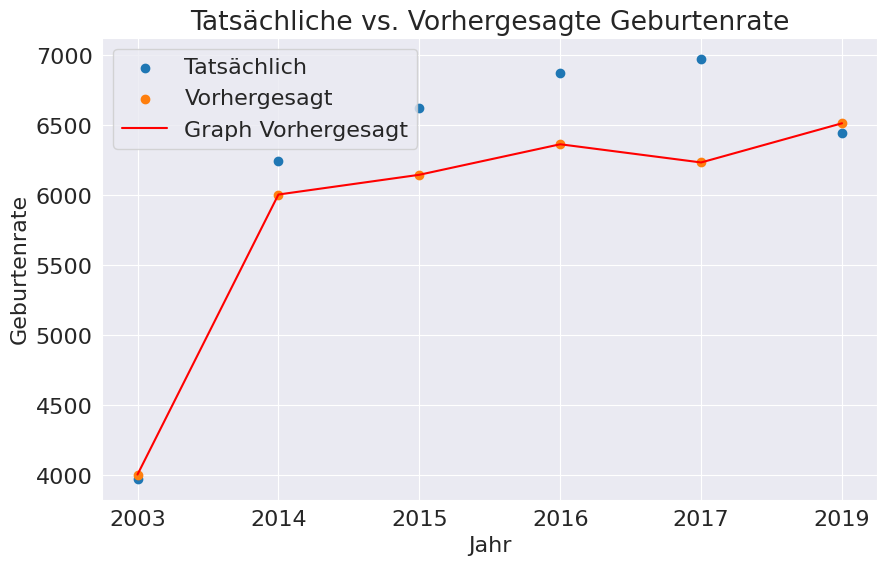

In [12]:
# Plotting actual/predicted valuesplt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 16
plt.scatter(mlr_diff.index, mlr_diff['Actual value'], marker='o', label='Tatsächlich')
plt.scatter(mlr_diff.index, mlr_diff['Predicted value'], marker='o', label='Vorhergesagt')
plt.plot(mlr_diff.index, mlr_diff['Predicted value'], color='red', label='Graph')
plt.xlabel('Jahr')
plt.ylabel('Geburtenrate')
plt.title('Tatsächliche vs. Vorhergesagte Geburtenrate')
plt.legend()
plt.show()

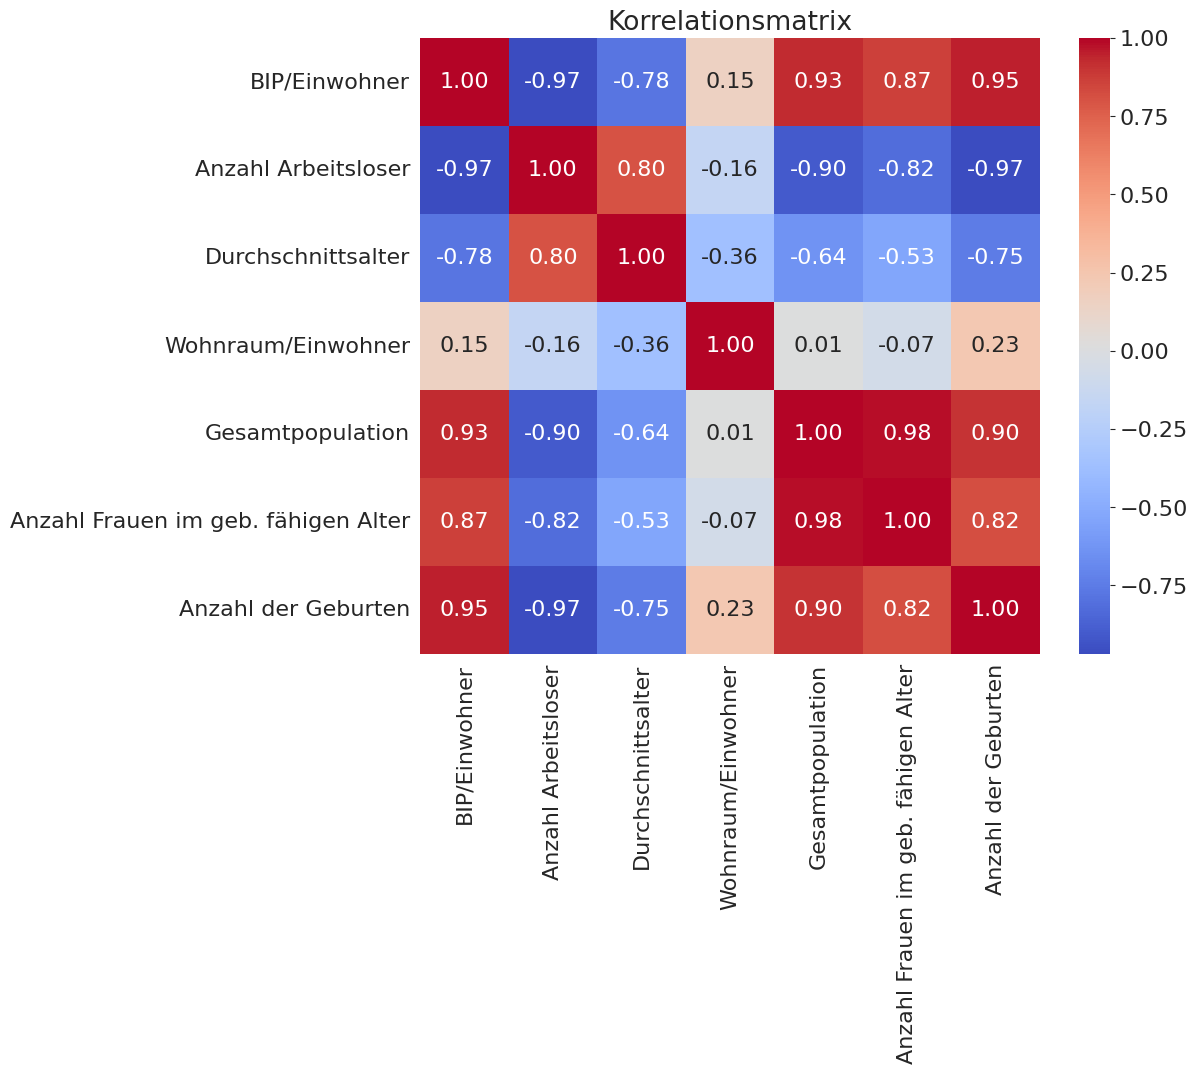

In [11]:
import seaborn as sns
# Corr Matrix
correlation_matrix = features_df_leipzig.drop('Stadt', axis=1).corr()

plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix')
plt.show()

In [7]:
from data_dresden import features_df_dresden
from data_leipzig import features_df_leipzig as features_df_leipzig_2

# New Attempt with more Data and Wohnraum/Einwohner dropped
features_df_leipzig_2 = features_df_leipzig_2.drop('Wohnraum/Einwohner', axis=1)

merged_df_2 = pd.concat([features_df_leipzig_2, features_df_dresden])
merged_df_2 = merged_df_2.dropna().sort_index()

merged_df_2

,BIP/Einwohner,Anzahl Arbeitsloser,Durchschnittsalter,Gesamtpopulation,Anzahl Frauen im geb. fähigen Alter,Anzahl der Geburten,Stadt
2002,23078,45376,4353239.0,494795,101048,3749,Leipzig
2003,23484,44627,4366615.0,497531,102206,3976,Leipzig
2004,23726,43957,4380127.0,498491,102883,4251,Leipzig
2005,24095,46870,4384754.0,502651,104506,4370,Leipzig
2006,25865,42273,439089.0,506578,104904,4378,Leipzig
2007,26733,39089,4400635.0,510512,104826,4690,Leipzig
2008,25870,36808,4400606.0,515469,104827,5263,Leipzig
2009,25562,34609,441.0,518862,104308,4997,Leipzig
2010,30048,33139,44.0,522883,104400,5303,Leipzig
2011,31292,30141,438.0,510043,102535,5602,Leipzig


[('BIP/Einwohner', -0.07507334260907658), ('Anzahl Arbeitsloser', -6.143834934347218e-05), ('Durchschnittsalter', 0.007096689247109486), ('Wohnraum/Einwohner', 0.0033361615736799484)]
Prediction for test set: [5563.4366191  7093.93571015 6369.19360326 5771.49072634 4632.31100239
 5759.43104691 6595.32849824 6701.40931169 4838.73670335]
      Actual value  Predicted value
2007          4690             4632
2008          5263             4838
2011          5602             5563
2012          5956             5771
2017          6350             6369
2019          6444             7093
2020          6468             6701
R squared: 86.63
Mean Absolute Error: 280.2581243431344
Mean Square Error: 139317.03028329057
Root Mean Square Error: 373.2519662149023


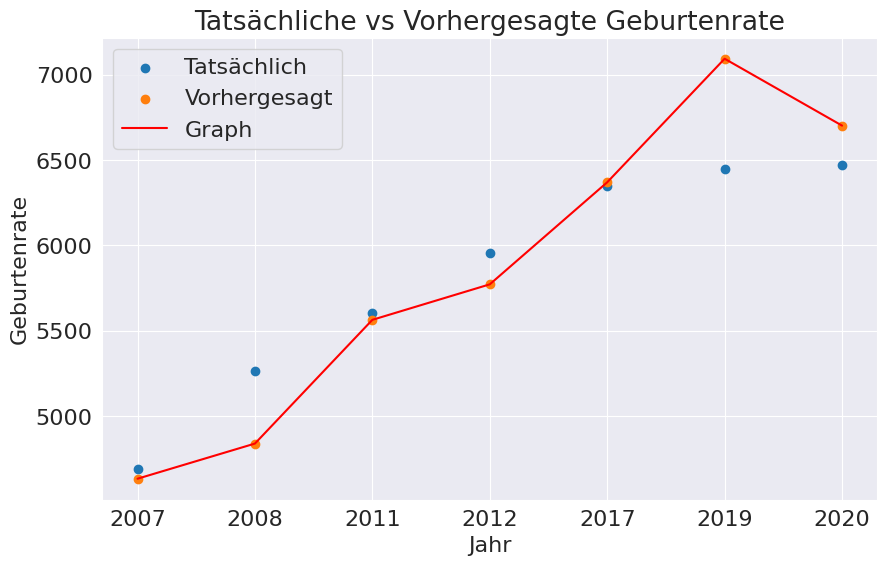

In [14]:
x_2 = merged_df_2.iloc[:, 1:-2]
y_2 = merged_df_2.iloc[:, -2]

# Data Splitting in test and train
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.3, random_state=100)

# MLR Model Creation
mlr_2 = LinearRegression()
mlr_2.fit(x_train_2, y_train_2)

# Coefficients
coef_names_2 = features_df_leipzig.columns[:6]
coef_values_2 = mlr_2.coef_
print(list(zip(coef_names_2, coef_values_2)))

# Predictions
y_pred_mlr_2 = mlr_2.predict(x_test_2)
print("Prediction for test set: {}".format(y_pred_mlr_2))

# Comparing Actual and Predictions
mlr_diff_2 = pd.DataFrame({'Actual value': y_test_2, 'Predicted value': y_pred_mlr_2}).astype(int).sort_index()
mlr_diff_2 = mlr_diff_2[~mlr_diff_2.index.duplicated(keep='first')]
print(mlr_diff_2)

# Model Evaluation
meanAbErr_2 = metrics.mean_absolute_error(y_test_2, y_pred_mlr_2)
meanSqErr_2 = metrics.mean_squared_error(y_test_2, y_pred_mlr_2)
rootMeanSqErr_2 = np.sqrt(meanSqErr_2)
r_squared_2 = mlr_2.score(x_2, y_2) * 100

print('R squared: {:.2f}'.format(r_squared_2))
print('Mean Absolute Error:', meanAbErr_2)
print('Mean Square Error:', meanSqErr_2)
print('Root Mean Square Error:', rootMeanSqErr_2)

# Plotting actual/predicted values
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 16
plt.scatter(mlr_diff_2.index, mlr_diff_2['Actual value'], marker='o',
            label='Tatsächlich')
plt.scatter(mlr_diff_2.index, mlr_diff_2['Predicted value'], marker='o',
            label='Vorhergesagt')
plt.plot(mlr_diff_2.index, mlr_diff_2['Predicted value'], color='red',
         label='Graph')
plt.xlabel('Jahr')
plt.ylabel('Geburtenrate')
plt.title('Tatsächliche vs Vorhergesagte Geburtenrate')
plt.legend()
plt.show()

In [9]:
# Comparing the evaluation metrics
evaluation_data = {
    'Model': ['Model 1', 'Model 2'],
    'Mean Absolute Error': [meanAbErr, meanAbErr_2],
    'Mean Squared Error': [meanSqErr, meanSqErr_2],
    'Root Mean Squared Error': [rootMeanSqErr, rootMeanSqErr_2],
    'R-squared': [r_squared, r_squared_2]
}

metrics_comparison = pd.DataFrame(evaluation_data)

metrics_comparison

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
0,Model 1,344.237799,182685.538886,427.417289,93.530361
1,Model 2,280.258124,139317.030283,373.251966,86.629286


In [10]:
# Example Use Case
# Calculate needed care time for day care children (3-6 years old) in leipzig in 2022
# Care Ratio
cr = 0.95

# Proportion of needed care time per day in hours (pnct)
pnct_above_seven = 0.865
pnct_five_to_seven = 0.111
pnct_below_five = 0.024

# Building the dataset & wiping out the dresden data
data =  x_2.loc[['2016', '2017', '2018', '2019']]
cleaned = data[~data.index.duplicated(keep='first')]
predictions = mlr_2.predict(cleaned)

total_children = predictions.sum()

total_children_with_care = total_children * cr

ct_above_seven = round(total_children_with_care * pnct_above_seven)
ct_five_to_seven = round(total_children_with_care * pnct_five_to_seven)
ct_below_five = round(total_children_with_care * pnct_below_five)

print('Betreuungszeit pro Tag: Anzahl der Kinder')
print('> 7h :', ct_above_seven)
print('5 - 7h :', ct_five_to_seven)
print('< 5h :', ct_below_five)
print('Gesamtzahl der zu betreuenden Kinder: ', round(total_children_with_care))

Betreuungszeit pro Tag: Anzahl der Kinder
> 7h : 22315
5 - 7h : 2864
< 5h : 619
Gesamtzahl der zu betreuenden Kinder:  25798
